# Sanity Tests

In [1]:
import time

import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision.transforms.functional as F

from dataset import load_sanity_dataset
from utils import show_result
from train import train

from models.UNet import UNet
from models.ViT_UNet import ViT_UNet
from models.UNETR import UNETR

### Load Sanity Dataset Object

Loading 2D sanity dataset...
MRI shape torch.Size([3, 256, 256])
Mask shape torch.Size([1, 256, 256])


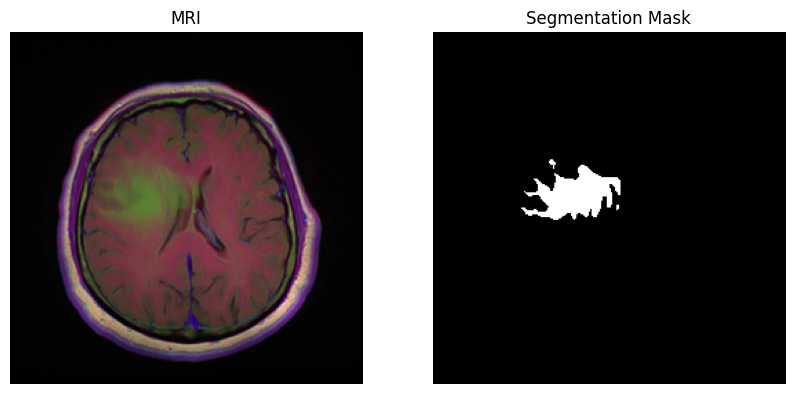

In [2]:
sanity_data = load_sanity_dataset()

X = sanity_data[0][0]
Y = sanity_data[0][1]
print('MRI shape', X.shape)
print('Mask shape',Y.shape)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(F.to_pil_image(X))
plt.title('MRI')
plt.axis('off')

plt.subplot(122)
plt.imshow(F.to_pil_image(Y), cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.show()

### Select Model

In [3]:
net = UNet()
#net = ViT_UNet()
#net = UNETR()


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

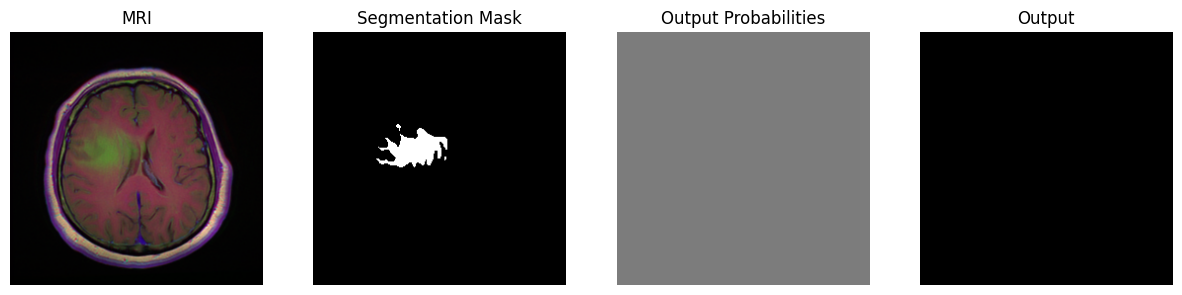

In [8]:
net = UNet()
net.eval()
y_prob = net(X.unsqueeze(0)).to('cpu').squeeze()
show_result(X, Y, y_prob)

Epoch: 0 Loss: 0.7731444835662842
Epoch: 1 Loss: 0.27288228273391724
Epoch: 2 Loss: 0.09024864435195923
Epoch: 3 Loss: 0.07433182001113892
Epoch: 4 Loss: 0.058266229927539825
Epoch: 5 Loss: 0.05088943615555763
Epoch: 6 Loss: 0.05046868324279785
Epoch: 7 Loss: 0.04921170324087143
Epoch: 8 Loss: 0.05019448697566986
Epoch: 9 Loss: 0.051793038845062256
Epoch: 10 Loss: 0.0531248077750206
Epoch: 11 Loss: 0.05422262102365494
Epoch: 12 Loss: 0.0551125593483448
Epoch: 13 Loss: 0.05577286332845688
Epoch: 14 Loss: 0.05619056895375252
Epoch: 15 Loss: 0.05637010186910629
Epoch: 16 Loss: 0.05633959919214249
Epoch: 17 Loss: 0.0561293363571167
Epoch: 18 Loss: 0.05575547367334366
Epoch: 19 Loss: 0.055226173251867294
Epoch: 20 Loss: 0.05455384403467178
Epoch: 21 Loss: 0.05375717580318451
Epoch: 22 Loss: 0.052849180996418
Epoch: 23 Loss: 0.05184523016214371
Epoch: 24 Loss: 0.05075954273343086
Epoch: 25 Loss: 0.04963240772485733
Epoch: 26 Loss: 0.04849182069301605
Epoch: 27 Loss: 0.04729193076491356
Epoch

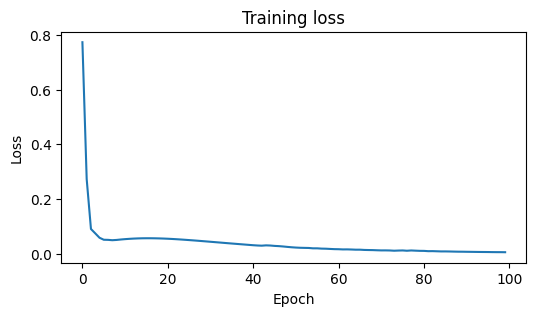

In [9]:
num_epoch = 100
batch_size = 1
optimizer=torch.optim.SGD(net.parameters(), lr=0.5, momentum=0.9)

start_time = time.time()

loss_graph, iterations = train(net,
                               sanity_data,
                               num_epoch,
                               device,
                               batch_size=batch_size,
                               optimizer=optimizer)

end_time = time.time()
duration = time.strftime("%Hh %Mm %Ss", time.gmtime(end_time-start_time))
print(f'Training took {duration}')

plt.figure(figsize=(6, 3))
plt.plot(np.arange(0, iterations), loss_graph)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss')
plt.show()

torch.Size([3, 256, 256])
torch.Size([256, 256])
5.015057087566098e-17 0.8420189619064331


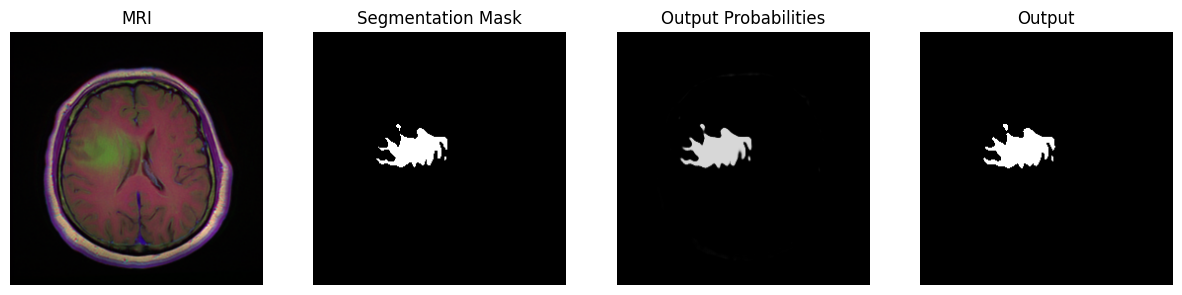

In [10]:
net.eval()

y_prob = net(X.unsqueeze(0)).squeeze().detach()

print(X.shape)
print(y_prob.shape)
print(y_prob.min().item(), y_prob.max().item())

show_result(X, Y, y_prob)
